In [ ]:
!pip uninstall tensorflow
!pip install tensorflow==2.12.0

Found existing installation: tensorflow 2.14.0
Uninstalling tensorflow-2.14.0:
  Would remove:
    /usr/local/bin/estimator_ckpt_converter
    /usr/local/bin/import_pb_to_tensorboard
    /usr/local/bin/saved_model_cli
    /usr/local/bin/tensorboard
    /usr/local/bin/tf_upgrade_v2
    /usr/local/bin/tflite_convert
    /usr/local/bin/toco
    /usr/local/bin/toco_from_protos
    /usr/local/lib/python3.10/dist-packages/tensorflow-2.14.0.dist-info/*
    /usr/local/lib/python3.10/dist-packages/tensorflow/*
Proceed (Y/n)? y
  Successfully uninstalled tensorflow-2.14.0
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 585.9/585.9 MB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 75.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 102.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.7/440.7 kB 49.3 MB/s eta 0:00:00
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.14.0
 

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.model_selection import GridSearchCV,train_test_split
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from tensorflow.keras.layers import Dense
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, StandardScaler
from keras.layers import Input
from keras.models import Model

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd "/content/drive/MyDrive/Colab Notebooks"

/content/drive/MyDrive/Colab Notebooks


In [ ]:
#read the data
df = pd.read_csv("CustomerChurn_dataset.csv")

In [ ]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [ ]:
missing_values = df.isnull().sum()
# display the count of missing values for each column
print(missing_values)

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [ ]:
# Convert 'TotalCharges' column to numeric
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

Subplots for visualization

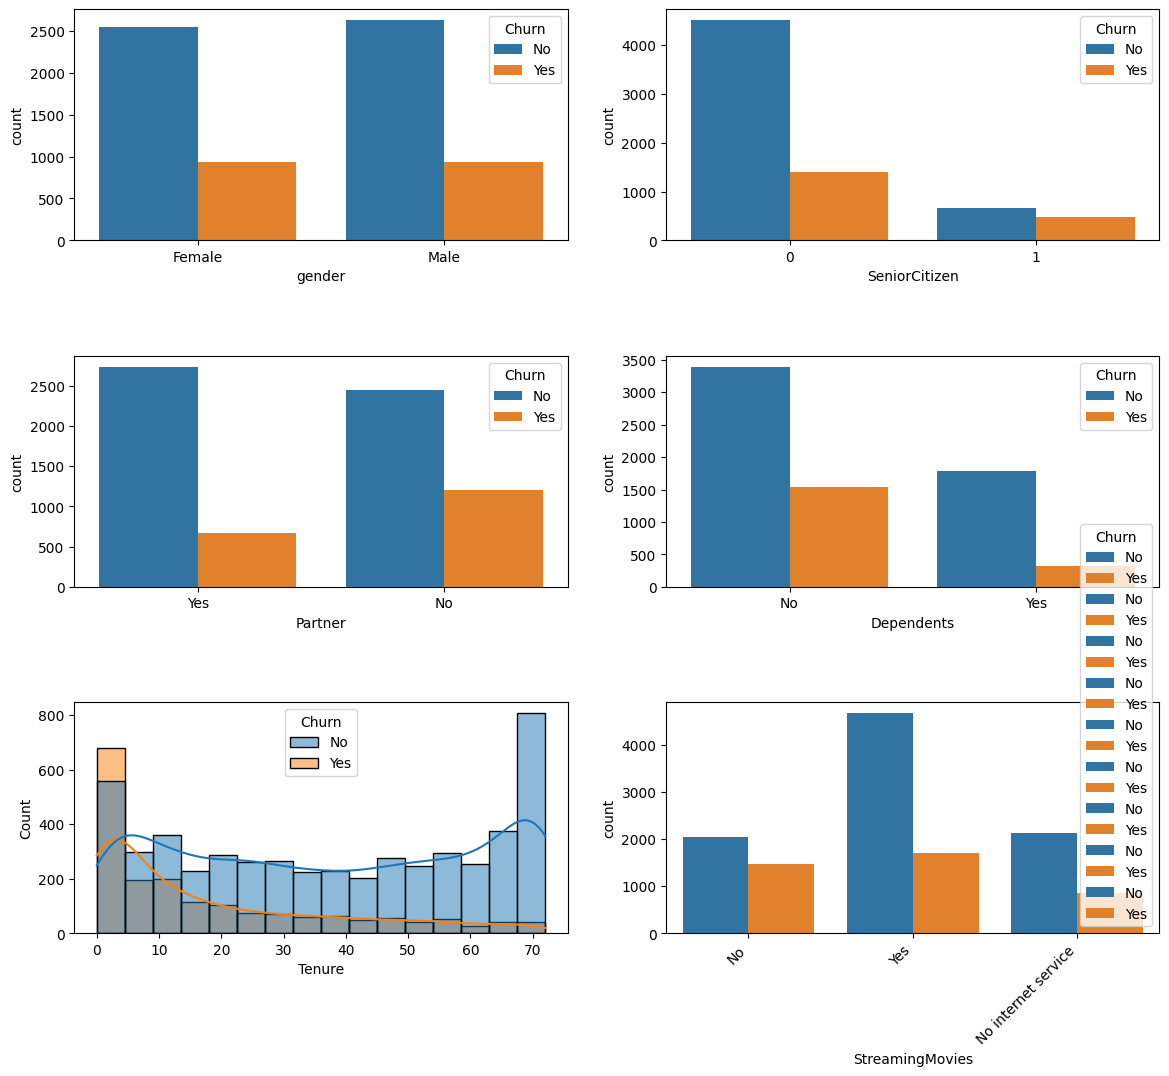

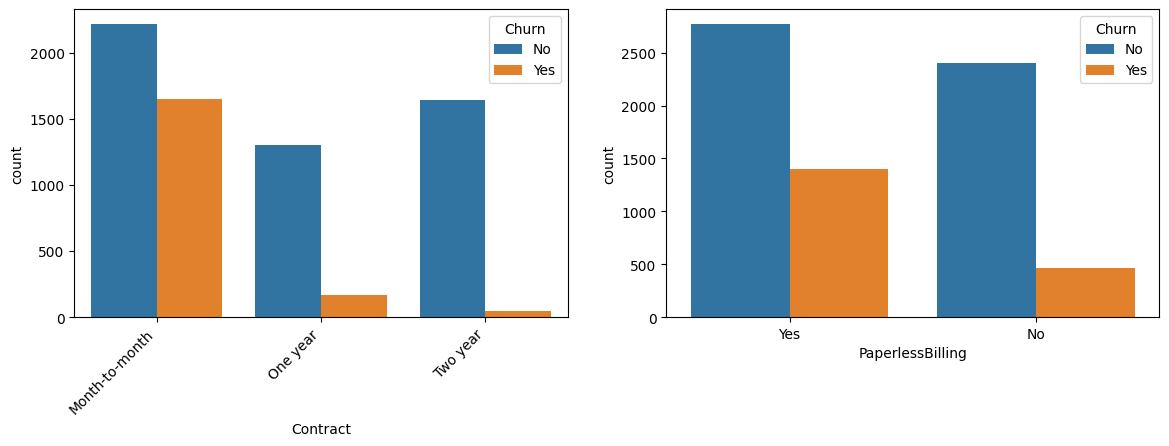

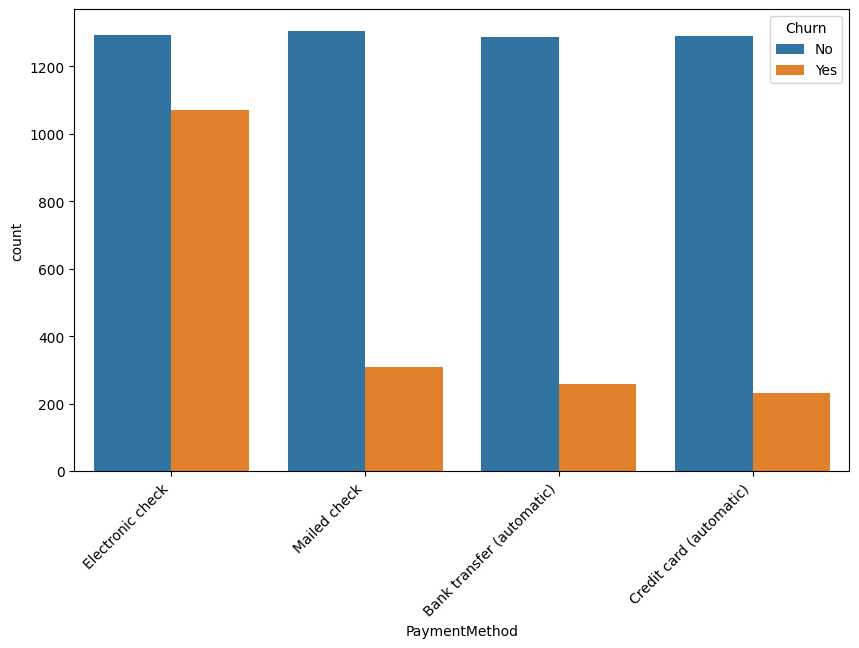

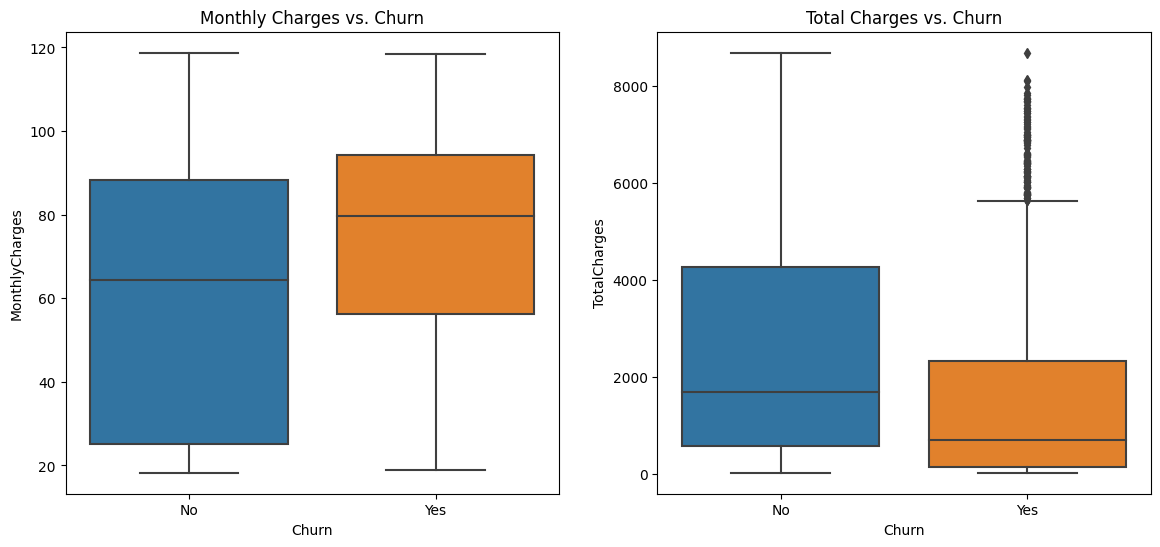

In [ ]:
#set up subplots for visualization
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(14, 12))
fig.subplots_adjust(hspace=0.5)

#demographic analysis
sns.countplot(x='gender', hue='Churn', data=df, ax=axes[0, 0])
sns.countplot(x='SeniorCitizen', hue='Churn', data=df, ax=axes[0, 1])
sns.countplot(x='Partner', hue='Churn', data=df, ax=axes[1, 0])
sns.countplot(x='Dependents', hue='Churn', data=df, ax=axes[1, 1])

#tenure analysis
sns.histplot(data=df, x='tenure', hue='Churn', kde=True, ax=axes[2, 0])
axes[2, 0].set_xlabel('Tenure')

#service Analysis
service_features = ['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
                    'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
for feature in service_features:
    sns.countplot(x=feature, hue='Churn', data=df, ax=axes[2, 1])
    axes[2, 1].set_xticklabels(axes[2, 1].get_xticklabels(), rotation=45, horizontalalignment='right')

# Display Contract and Billing Analysis
plt.figure(figsize=(14, 4))
plt.subplot(1, 2, 1)
sns.countplot(x='Contract', hue='Churn', data=df)
plt.xticks(rotation=45, horizontalalignment='right')
plt.subplot(1, 2, 2)
sns.countplot(x='PaperlessBilling', hue='Churn', data=df)

# Payment Method Analysis
plt.figure(figsize=(10, 6))
sns.countplot(x='PaymentMethod', hue='Churn', data=df)
plt.xticks(rotation=45, horizontalalignment='right')

# Monthly and Total Charges Analysis
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))
sns.boxplot(x='Churn', y='MonthlyCharges', data=df, ax=axes[0])
axes[0].set_title('Monthly Charges vs. Churn')
sns.boxplot(x='Churn', y='TotalCharges', data=df, ax=axes[1])
axes[1].set_title('Total Charges vs. Churn')

# Display the plots
plt.show()

Based on our exploratory data analysis (EDA) insights, we can create customer profiles that are more likely to churn:

1. **Demographic Profile:**
   - Senior Citizens: Customers who are senior citizens are more likely to churn.
   - Non-Partners: Customers who are not in a partnership (i.e., single customers) are more likely to churn.
   - Dependents: Customers with no dependents are more likely to churn.

2. **Tenure Profile:**
   - Customers with shorter tenure (new customers) are more likely to churn.

3. **Service Profile:**
   - StreamingMovies: Customers with internet service and streaming movies are less likely to churn.
   - InternetService: Customers with no internet service are less likely to churn.

4. **Contract and Billing Profile:**
   - Month-to-Month Contract: Customers with a month-to-month contract are more likely to churn.
   - Paperless Billing: Customers with paperless billing are more likely to churn.

5. **Payment Method Profile:**
   - Electronic Check: Customers using electronic check as a payment method are more likely to churn.
   - Mailed Check: Customers using mailed check as a payment method are less likely to churn.

6. **Monthly and Total Charges Profile:**
   - Higher Monthly Charges: Customers with higher monthly charges are more likely to churn.
   - Lower Total Charges: Customers with lower total charges are more likely to churn.

#Training
Preprocess tha data

In [ ]:
# Encode categorical features using LabelEncoder
encoder = LabelEncoder()
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    df[col] = encoder.fit_transform(df[col])

In [ ]:
# Handle missing values
imputer = SimpleImputer(strategy='median')
df = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

In [ ]:
df = df.drop(columns=['customerID'])

In [ ]:
# Split into features and target
X = df.drop(columns=['Churn'])
y = df['Churn']

In [ ]:
# Convert categorical labels to binary
y_binary = (y == 1).astype(int)

In [ ]:
# Split the data into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y_binary, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [ ]:
# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

#Training

In [ ]:
# Initialize the MLPClassifier with a specific learning rate
mlp = MLPClassifier(learning_rate_init=0.01, max_iter=1000, random_state=42)

param_grid = {
    'hidden_layer_sizes': [(100,), (50, 50), (100, 50), (50, 100)],
    'activation': ['tanh', 'relu'],
    'alpha': [0.001, 0.01],
}

grid_search = GridSearchCV(mlp, param_grid, cv=5, scoring='accuracy')

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_mlp = MLPClassifier(**best_params)

# Fit the best MLP model on your data
best_mlp.fit(X_train, y_train)

y_pred = best_mlp.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
auc_score = roc_auc_score(y_test, best_mlp.predict_proba(X_test)[:, 1])
print(accuracy)
print(auc_score)

0.7588652482269503
0.8045507282408271


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


#Optimization and testing





In [ ]:
!pip install scikeras

In [ ]:
from sklearn.model_selection import GridSearchCV
from scikeras.wrappers import KerasClassifier
from keras.utils import to_categorical
from keras.layers import Input
from keras.models import Model


# Define the Keras model using the functional API
def create_keras_model():
    inputs = Input(shape=(X_train.shape[1],))
    x = Dense(8, activation='relu')(inputs)
    outputs = Dense(1, activation='sigmoid')(x)  # Binary classification
    model = Model(inputs=inputs, outputs=outputs)
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# Create KerasClassifier
keras_classifier = KerasClassifier(build_fn=create_keras_model, epochs=50, batch_size=10, verbose=0)

# Define your param_grid
param_grid = {
    'optimizer': ['adam', 'sgd'],
}

# Create GridSearchCV
grid_search = GridSearchCV(estimator=keras_classifier, param_grid=param_grid, cv=3)

# Fit the model
grid_search.fit(X_train, y_train)

# Get the best model
best_model = grid_search.best_estimator_


# Predict probabilities on the validation set
y_val_prob = best_model.predict_proba(X_val)[:, 1]

# Calculate AUC score
auc_score = roc_auc_score(y_val, y_val_prob)

print(f"Best Parameters: {grid_search.best_params_}")
print(f"Validation Accuracy: {best_model.score(X_val, y_val)}")
print(f"Validation AUC Score: {auc_score}")

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/scikeras

Best Parameters: {'optimizer': 'sgd'}
Validation Accuracy: 0.8082386363636364
Validation AUC Score: 0.8412788713164183


#saving

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense

# Define the best parameters obtained from the grid search
best_params = grid_search.best_params_

# Define the Keras model using the functional API
inputs = Input(shape=(X_train.shape[1],))
x = Dense(8, activation='relu')(inputs)
outputs = Dense(1, activation='sigmoid')(x)  # Binary classification
best_model = Model(inputs=inputs, outputs=outputs)
best_model.compile(loss='binary_crossentropy', optimizer=best_params['optimizer'], metrics=['accuracy'])

# Save the best model
best_model.save('best_model.h5')
